In [22]:
#imports
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [23]:
datafiles = ["../data/data-" + str(i+1).zfill(2) + ".csv" for i in range(12)]

In [26]:
# read dataset
data = None
for datafile in datafiles:
    new_data = pd.read_csv(datafile, parse_dates=[1], infer_datetime_format=True, usecols=["VendorID", "tpep_pickup_datetime", "passenger_count", "trip_distance", "PULocationID", "DOLocationID", "payment_type", "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount", "congestion_surcharge"])
    new_data = new_data.dropna()
    new_data['pickup_month'] = new_data['tpep_pickup_datetime'].dt.month
    new_data['pickup_hour'] = new_data['tpep_pickup_datetime'].dt.hour
    new_data['pickup_day_of_week'] = new_data['tpep_pickup_datetime'].dt.day_of_week
    new_data = new_data.drop(columns=["tpep_pickup_datetime"])
    new_data = new_data[new_data['tip_amount'] >= 0]
    new_data = new_data[new_data['fare_amount'] >= 0]
    if data is None:
        data = new_data
    else:
        data = pd.concat([data, new_data], ignore_index=True)
    



    
#data = pd.read_csv('../data/data-01.csv', parse_dates=[1], infer_datetime_format=True, usecols=["VendorID", "tpep_pickup_datetime", "passenger_count", "trip_distance", "PULocationID", "DOLocationID", "payment_type", "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount", "congestion_surcharge"])
#data = pd.read_csv('../data/data-05.csv', parse_dates=[1], infer_datetime_format=True)

# Extract some additional features
#data['pickup_month'] = data['tpep_pickup_datetime'].dt.month
#data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour
#data['pickup_day_of_week'] = data['tpep_pickup_datetime'].dt.day_of_week



# Drop non-numbers
#data = data.dropna()
# RatecodeID causes very negative effect on the model
#data = data.drop(columns=["tpep_pickup_datetime", "tpep_dropoff_datetime", "store_and_fwd_flag", "RatecodeID"])

In [27]:
# Review the data
data.head(15)

,VendorID,tpep_pickup_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_month,pickup_hour,pickup_day_of_week
0,1.0,2020-01-01 00:28:15,1.0,1.20,238,239,1.0,6.00,3.0,0.5,1.47,0.0,0.3,11.27,2.5,1,0,2
1,1.0,2020-01-01 00:35:39,1.0,1.20,239,238,1.0,7.00,3.0,0.5,1.50,0.0,0.3,12.30,2.5,1,0,2
2,1.0,2020-01-01 00:47:41,1.0,0.60,238,238,1.0,6.00,3.0,0.5,1.00,0.0,0.3,10.80,2.5,1,0,2
3,1.0,2020-01-01 00:55:23,1.0,0.80,238,151,1.0,5.50,0.5,0.5,1.36,0.0,0.3,8.16,0.0,1,0,2
4,2.0,2020-01-01 00:01:58,1.0,0.00,193,193,2.0,3.50,0.5,0.5,0.00,0.0,0.3,4.80,0.0,1,0,2
5,2.0,2020-01-01 00:09:44,1.0,0.03,7,193,2.0,2.50,0.5,0.5,0.00,0.0,0.3,3.80,0.0,1,0,2
6,2.0,2020-01-01 00:39:25,1.0,0.00,193,193,1.0,2.50,0.5,0.5,0.01,0.0,0.3,3.81,0.0,1,0,2
7,2.0,2019-12-18 15:27:49,1.0,0.00,193,193,1.0,0.01,0.0,0.0,0.00,0.0,0.3,2.81,2.5,12,15,2
8,2.0,2019-12-18 15:30:35,4.0,0.00,193,193,1.0,2.50,0.5,0.5,0.00,0.0,0.3,6.30,2.5,12,15,2
9,1.0,2020-01-01 00:29:01,2.0,0.70,246,48,1.0,8.00,3.0,0.5,2.35,0.0,0.3,14.15,2.5,1,0,2


In [33]:
# reject meaningless data
#data = data[data['tip_amount'] >= 0]
#data = data[data['fare_amount'] >= 0]
data = data.drop(columns=["tpep_pickup_datetime"])

In [34]:
# split 70%/30%
x_train, x_test = train_test_split(data, test_size=0.3)
# Reduce training array size to minimal to test model
#x_train = x_train[0:1000]
y_train, y_test = x_train['tip_amount'], x_test['tip_amount']
# Drop column we're predicting from the dataset
del x_train['tip_amount']
del x_test['tip_amount']

In [35]:
y_train.shape

(16622526,)

In [36]:
# Add random error to test model
#y_random = np.random.rand(4437577,)
#y_train = np.add(y_train, y_random)

In [37]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

x_test=np.array(x_test)
y_test=np.array(y_test)

In [38]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16622526, 16)
(7123940, 16)
(16622526,)
(7123940,)


In [39]:
clf_ = SGDRegressor()
# Run the regression
clf_.fit(x_train, y_train)

SGDRegressor()

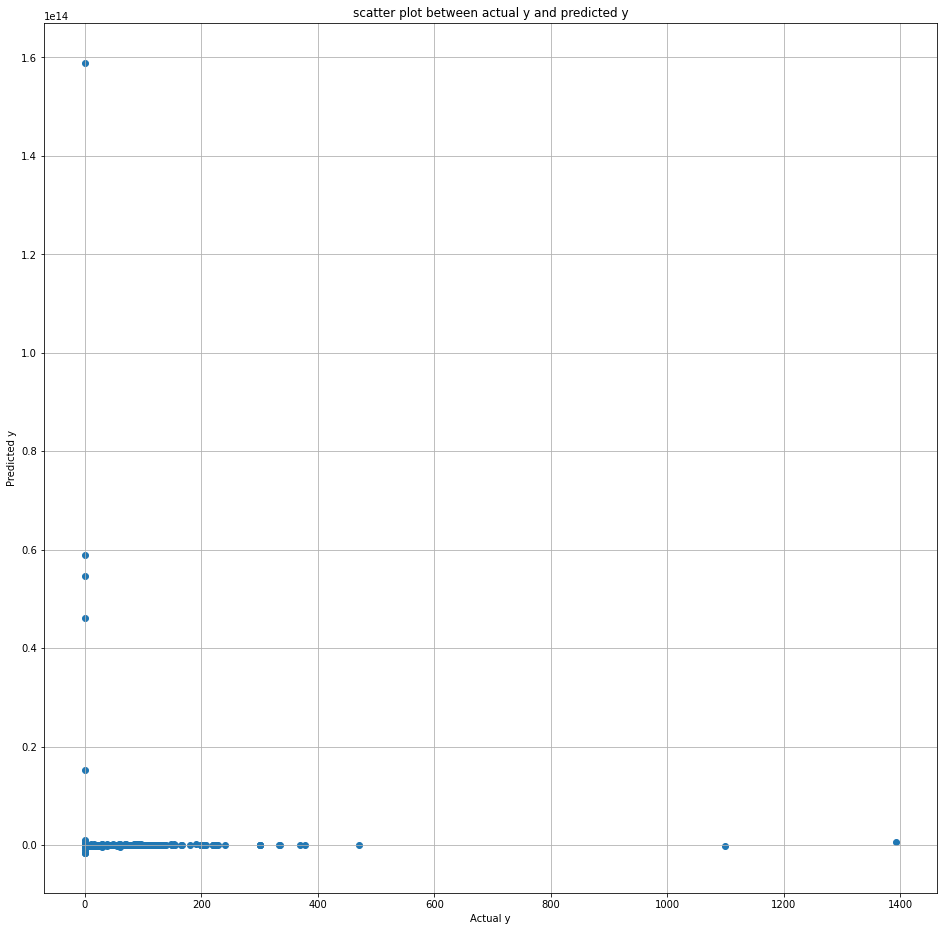

Mean Squared Error : 4.800299699727964e+21
Mean Absolute Error : 2308786166.7987165


In [40]:
# Plot data
plt.figure(figsize=(16,16))
plt.scatter(y_test,clf_.predict(x_test))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')

plt.show()

print('Mean Squared Error :',mean_squared_error(y_test, clf_.predict(x_test)))
print('Mean Absolute Error :',mean_absolute_error(y_test, clf_.predict(x_test)))

In [12]:
import pickle

model_filename = "../results/model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(clf_, file)
    
scaler_filename = "../results/scaler.pkl"
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)